## 抠图

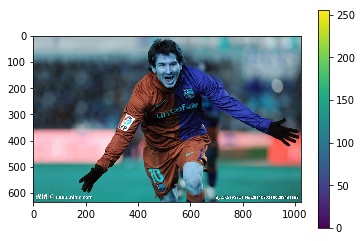

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  6.61132621e-02,   2.69907029e-01,   1.05857906e-01,
           2.25618503e-01,   3.32503300e-01,   2.53632191e+02,
           1.98514066e+02,   2.09830045e+02,   4.02185773e+01,
           1.34550860e+02,   1.36989239e+02,   1.54835360e+02,
           1.38694346e+02,   1.38417982e+02,   1.36082746e+02,
           1.67499790e+02,   1.77739962e+02,   4.56993088e+01,
           6.19395847e+01,   7.34844091e+01,   3.15339743e+00,
           8.66267967e+00,   8.97185331e+00,   8.66267967e+00,
           3.15860495e+02,   2.72923612e+02,   8.97185331e+00,
           2.72923612e+02,   2.50301593e+02,   5.15648233e+01,
           4.75120659e+01,   5.18867687e+01,   4.75120659e+01,
           8.63976372e+02,   4.06495057e+02,   5.18867687e+01,
           4.0649

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/situ.st.1/Pictures/messi.jpg')
plt.imshow(img),plt.colorbar(),plt.show()

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (170,10,700,636)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

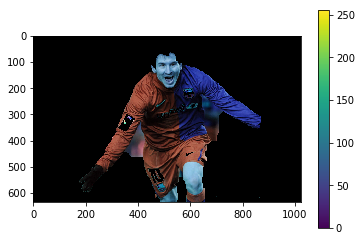

(<matplotlib.image.AxesImage at 0xa075390>,
 None)

In [4]:
#mask-掩模图像，用来确定那些区域是背景，前景，可能是前景/背景等。
#可以设置为：cv2.GC_BGD,cv2.GC_FGD,cv2.GC_PR_BGD,cv2.GC_PR_FGD，
#或者直接输入0,1,2,3 也行。

#grabcut它修改掩图,在新的掩模图像中,所有的像素被分为四类：背景,前景,可能是背景/前景使用4个不同的标签标记
#然后我们来修改掩模图像,所有的0像素和1像素都被归为0（例如背景),所有的1 像素和3像素都被归为1（前景）。
#我们最终的掩模图像就这样准备好了。用它和输入图像相乘就得到了分割好的图像。

# 函数的返回值是更新的mask, bgdModel, fgdModel
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis] #a*b,对应位置元素相乘，np.newaixs插入新维度

plt.imshow(img),plt.colorbar(),plt.show()